In [1]:
import sys
!conda install --yes --prefix {sys.prefix} numpy seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.9.0
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.2



# All requested packages already installed.



In [2]:
import os
directory = 'log/'

from dataclasses import dataclass

@dataclass
class LogItem:
    malloc_count: int
    free_count: int

    alloc_p50: int
    alloc_p90: int
    alloc_p99: int
    alloc_worst: int
    
    free_p50: int
    free_p90: int
    free_p99: int
    free_worst: int
 
res = dict()
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # if os.path.isfile(f):
    #     print(f)
    
    with open(f) as log_file:
        # split filename
        f = f.replace(directory, "").split(".")
        print(f)
        elf_name = f[0]
        benchmark_type = f[1]
        benchmark_run = f[2]

        # parse data
        str = log_file.readline()
        str = str.replace("\n", "").replace("ns", "").split(",")
        print(str)

        """
        malloc count, free count, alloc p50, p90, p99, worst, free p50, p90, p99, worst
        """

        # store data
        if elf_name not in res:
            res[elf_name] = dict()
        if benchmark_type not in res[elf_name]:
            res[elf_name][benchmark_type] = list()
        res[elf_name][benchmark_type].append(LogItem(
            malloc_count=str[0],
            free_count=str[1],

            alloc_p50=str[2],
            alloc_p90=str[3],
            alloc_p99=str[4],
            alloc_worst=str[5],
            
            free_p50=str[6],
            free_p90=str[7],
            free_p99=str[8],
            free_worst=str[9],
        ))

print(res)

# analyze across run

['coremark', 'baseline', '5', 'log']
['10440', '2789', '1045', '1126', '1591', '71200', '1046', '1103', '1536', '2385']
['coremark', 'single_tlsf', '47', 'log']
['10488', '2825', '1051', '1243', '3640', '20974', '979', '1106', '1508', '11794']
['dhrystone', 'single_tlsf', '25', 'log']
['3505', '505', '1120', '1501', '4244', '25811', '1110', '1518', '1716', '1973']
['dhrystone', 'single_tlsf', '31', 'log']
['3505', '505', '968', '1309', '3885', '27405', '969', '1314', '1607', '1803']
['dhrystone', 'single_tlsf', '19', 'log']
['3505', '505', '965', '1101', '3442', '32121', '961', '1091', '1629', '1736']
['chacha20', 'baseline', '4', 'log']
['4608', '549', '1217', '1320', '1553', '75444', '1219', '1284', '1498', '14140']
['coremark', 'baseline', '37', 'log']
['10436', '2786', '922', '1043', '1465', '59839', '921', '1024', '1422', '10315']
['coremark', 'baseline', '23', 'log']
['10412', '2764', '918', '1077', '1456', '57620', '916', '1003', '1338', '1659']
['chacha20', 'single_tlsf', '48',

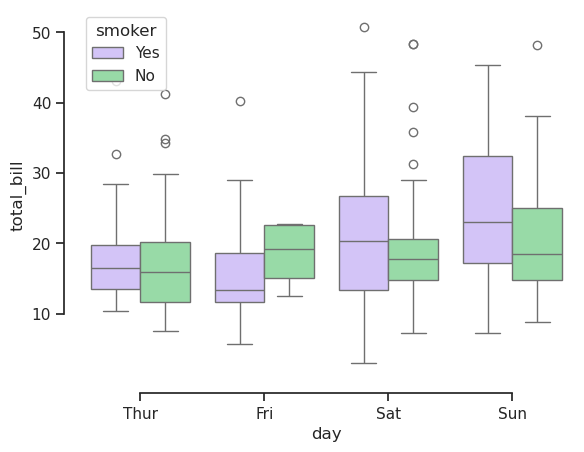

In [3]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

In [10]:
import pandas as pd

# transform the data
data = []
# y = time, x = benchmark_time_category (p50...), hue = benchmark_type (baseline...)+elf_name
for elf_name in res:
    if elf_name == "chacha20":
        for benchmark_type in res[elf_name]:
            items = res[elf_name][benchmark_type]
    
            for item in items:
                data.append([ item.alloc_p50, "alloc_p50", f"{benchmark_type}_{elf_name}" ])
                data.append([ item.alloc_p90, "alloc_p90", f"{benchmark_type}_{elf_name}" ])
                # data.append([ item.alloc_p99, "alloc_p99", f"{benchmark_type}_{elf_name}" ])
                # data.append([ item.alloc_worst, "alloc_worst", f"{benchmark_type}_{elf_name}" ])
        
                data.append([ item.free_p50, "free_p50", f"{benchmark_type}_{elf_name}" ])
                data.append([ item.free_p90, "free_p90", f"{benchmark_type}_{elf_name}" ])
                # data.append([ item.free_p99, "free_p99", f"{benchmark_type}_{elf_name}" ])
                # data.append([ item.free_worst, "free_worst", f"{benchmark_type}_{elf_name}" ])

# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['ns', 'benchmark_time_category', 'benchmark_type'])
df.columns = ['ns', 'benchmark_time_category', 'benchmark_type']
df

,ns,benchmark_time_category,benchmark_type
0,1217,alloc_p50,baseline_chacha20
1,1320,alloc_p90,baseline_chacha20
2,1219,free_p50,baseline_chacha20
3,1284,free_p90,baseline_chacha20
4,1058,alloc_p50,baseline_chacha20
...,...,...,...
395,1462,free_p90,single_tlsf_chacha20
396,1293,alloc_p50,single_tlsf_chacha20
397,1408,alloc_p90,single_tlsf_chacha20
398,1259,free_p50,single_tlsf_chacha20


In [11]:
df["ns"] = pd.to_numeric(df["ns"])
df.sort_values('ns') # crucial
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ns                       400 non-null    int64 
 1   benchmark_time_category  400 non-null    object
 2   benchmark_type           400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


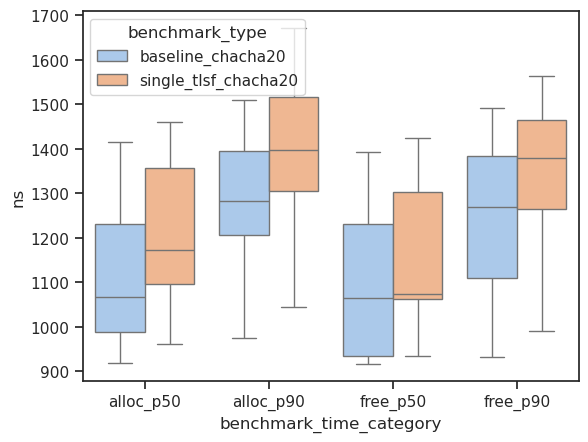

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_theme(rc={'figure.figsize':(10, 10)})

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="benchmark_time_category", y="ns",
            hue="benchmark_type",
            data=df)
plt.savefig("coremark_p50_p90_M1.png")

In [13]:
import pandas as pd

# transform the data
data = []
# y = time, x = benchmark_time_category (p50...), hue = benchmark_type (baseline...)+elf_name
for elf_name in res:
    for benchmark_type in res[elf_name]:
        items = res[elf_name][benchmark_type]

        for item in items:
            # data.append([ item.alloc_p50, "alloc_p50", f"{benchmark_type}_{elf_name}" ])
            # data.append([ item.alloc_p90, "alloc_p90", f"{benchmark_type}_{elf_name}" ])
            data.append([ item.alloc_p99, "alloc_p99", f"{benchmark_type}_{elf_name}" ])
            data.append([ item.alloc_worst, "alloc_worst", f"{benchmark_type}_{elf_name}" ])
    
            # data.append([ item.free_p50, "free_p50", f"{benchmark_type}_{elf_name}" ])
            # data.append([ item.free_p90, "free_p90", f"{benchmark_type}_{elf_name}" ])
            data.append([ item.free_p99, "free_p99", f"{benchmark_type}_{elf_name}" ])
            data.append([ item.free_worst, "free_worst", f"{benchmark_type}_{elf_name}" ])

# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['ns', 'benchmark_time_category', 'benchmark_type'])
df.columns = ['ns', 'benchmark_time_category', 'benchmark_type']
df

,ns,benchmark_time_category,benchmark_type
0,1591,alloc_p99,baseline_coremark
1,71200,alloc_worst,baseline_coremark
2,1536,free_p99,baseline_coremark
3,2385,free_worst,baseline_coremark
4,1465,alloc_p99,baseline_coremark
...,...,...,...
1995,2841,free_worst,baseline_captcha
1996,1521,alloc_p99,baseline_captcha
1997,69539,alloc_worst,baseline_captcha
1998,1406,free_p99,baseline_captcha


In [8]:
df["ns"] = pd.to_numeric(df["ns"])
df.sort_values('ns') # crucial
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ns                       2000 non-null   int64 
 1   benchmark_time_category  2000 non-null   object
 2   benchmark_type           2000 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


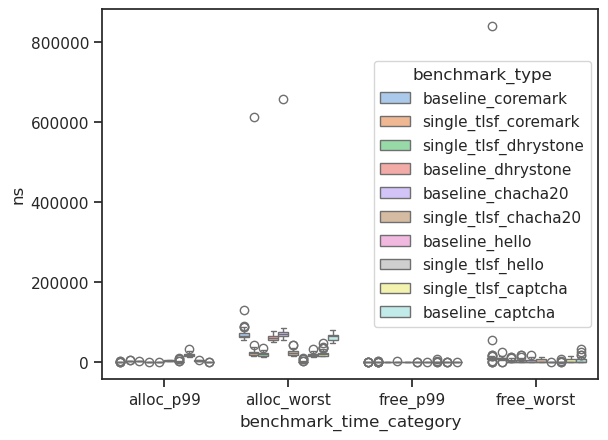

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_theme(rc={'figure.figsize':(10, 10)})

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="benchmark_time_category", y="ns",
            hue="benchmark_type",
            data=df)
plt.savefig("coremark_p99_worst_M1.png")